# An analysis on PMO's twitter handle

This notebook analyses some 3400 of the most recent tweets from the Prime Minister's Office. It is interesting to see when the PMO tweets, at what rate the tweets delivered, the number of tweets on each day of the week, top five tweets with most upvotes.

Percentage of RTs vs tweets

Using the fastest succesive tweets, it is possible to calculate the typing speed of the person behind those tweets,typing speed vs time of day, assuming that the tweets are typed and not copied from some pre-written text. Also a statistics of word are of interest.

Can we learn to tweet like this person?

In [173]:
import re
import pickle
import pandas as pd
import pytz
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [174]:
#read the raw_data from outfile
file_name = 'outfile_PMO'
with open (file_name, 'rb') as fp:
    itemlist = pickle.load(fp)

In [175]:
outtweets = [[tweet.user.name, tweet.created_at, tweet.text.encode("utf-8"),tweet.favorite_count, tweet.retweet_count] for tweet in itemlist]

In [176]:
outtweets = [[tweet.user.name, tweet.created_at, tweet.text,tweet.favorite_count,tweet.retweet_count] for tweet in itemlist]
df=pd.DataFrame(outtweets,columns=['name','time','text','fav_count','rt_count'])
#convert time column to datetime and to IST from GMT
ist = pytz.timezone('Asia/Kolkata')
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(pytz.utc).dt.tz_convert(ist)

#Add column to convert date to weekday
df['day'] = df['time'].dt.weekday_name

In [177]:
#set time column as the index
df.index = df['time']
#del df['time']

# delta column captures time time taken to post the next tweet
df['delta'] = (df['time'].shift()-df['time']).fillna(0)

In [178]:
df

,name,time,text,fav_count,rt_count,day,delta
time,,,,,,,
2017-10-15 06:05:12+05:30,Kiran Bedi,2017-10-15 06:05:12+05:30,Good #MorningNutrition https://t.co/gCNSj4Egj8,96,13,Sunday,00:00:00
2017-10-14 21:07:38+05:30,Kiran Bedi,2017-10-14 21:07:38+05:30,Thank GOI for accepting my request to send a C...,595,64,Saturday,08:57:34
2017-10-14 16:45:34+05:30,Kiran Bedi,2017-10-14 16:45:34+05:30,Great sharing. So true. https://t.co/x7O5N4YOlN,540,76,Saturday,04:22:04
2017-10-14 08:42:12+05:30,Kiran Bedi,2017-10-14 08:42:12+05:30,Share good practices for dengue prevention in ...,486,92,Saturday,08:03:22
2017-10-14 07:13:05+05:30,Kiran Bedi,2017-10-14 07:13:05+05:30,Good #MorningNutrition https://t.co/QuriG7WMDO,439,52,Saturday,01:29:07
2017-10-14 07:11:49+05:30,Kiran Bedi,2017-10-14 07:11:49+05:30,So real. So true. https://t.co/nfKmnALQvL,425,47,Saturday,00:01:16
2017-10-13 12:48:46+05:30,Kiran Bedi,2017-10-13 12:48:46+05:30,With the new day comes new strength and new th...,327,39,Friday,18:23:03
2017-10-13 09:21:56+05:30,Kiran Bedi,2017-10-13 09:21:56+05:30,Along with being catalysts for change &amp; a ...,607,60,Friday,03:26:50
2017-10-13 06:38:30+05:30,Kiran Bedi,2017-10-13 06:38:30+05:30,A vision in practice in Puducherry to the bene...,617,60,Friday,02:43:26


In [179]:
# top five tweets with most favorite count. what do people like
df.sort(['fav_count'],ascending=[0]).head(5)


C:\Users\Debayan\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,time,text,fav_count,rt_count,day,delta
time,,,,,,,
2016-11-08 20:52:42+05:30,Kiran Bedi,2016-11-08 20:52:42+05:30,Within Minutes some Filthy Rich have become Po...,11636,5349,Tuesday,00:42:59
2017-04-25 18:17:59+05:30,Kiran Bedi,2017-04-25 18:17:59+05:30,U got to to see this. How integrated life is. ...,8909,3679,Tuesday,11:32:42
2017-07-13 21:28:18+05:30,Kiran Bedi,2017-07-13 21:28:18+05:30,We need more of her kind. \nMeet IPS Officer R...,8723,3720,Thursday,01:25:03
2017-09-03 14:14:30+05:30,Kiran Bedi,2017-09-03 14:14:30+05:30,Only a person of @PMOIndia kind could have app...,7661,2015,Sunday,01:02:05
2017-04-27 22:26:10+05:30,Kiran Bedi,2017-04-27 22:26:10+05:30,"""U fail as a nation when 70yrs old #VinodKhann...",6596,3717,Thursday,07:32:22


In [180]:
#I am sure there is a better way to do this
# Count the number of tweets done in an hour
time_tuples = ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','00:00']
tweet_count =[]
for count in range(1, 24):
    tweet_count.append(df.between_time(time_tuples[count-1],time_tuples[count]).count().text)



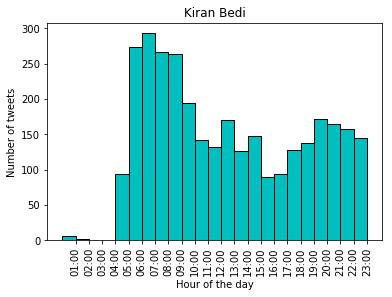

In [181]:
plt.bar(range(len(time_tuples[1:24])), tweet_count, width=-1.0, color='c', align='edge',edgecolor='black')
#plt.xticks(range(len(time_tuples[0:23])), tweet_count, size='small')
plt.xticks(range(len(time_tuples[1:24])),time_tuples[1:24] , rotation='vertical')
plt.ylabel('Number of tweets')
plt.xlabel('Hour of the day')
plt.title(df['name'][1])
fig1 = plt.gcf()
plt.show()
fig1.savefig(file_name+'1.png', dpi=300, bbox_inches='tight')




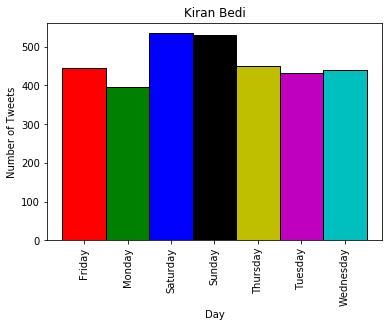

In [182]:
# Tweets on days of a week
d=df.groupby(['day']).size()
#plt.bar(range(len(tcday.values)),tcday.values)
#plt.show()

plt.bar(range(len(d)), d, width=-1.0, color='rgbkymc', align='center',edgecolor='black')
plt.xticks(range(len(d)),d.keys() , rotation='vertical')
plt.ylabel("Number of Tweets")
plt.xlabel("Day")
plt.title(df['name'][1])
fig2 = plt.gcf()
plt.show()
fig2.savefig(file_name+'2.png', dpi=300, bbox_inches='tight')

# Typing speed and retweets
Before looking at the typing speed, we need to remove the retweets. They are not typed and they can occur very frquently, very fast. They are bound to screw up any analysis, and needs to be handled seperately.

In [183]:
# Create a new dataframe where the RTs are removed

#convert object to string
df['text'] = df['text'].astype('str') 


#reset index before removing RTs
df_nort = df
df_nort=df_nort.reset_index(drop=True)

#remove RTs and save in nort dataframe

df_nort = df_nort[~df_nort.text.str.contains('RT')]

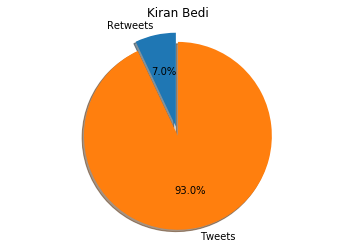

In [184]:
# percentage of retweets vs tweets
rts = len(df)-len(df_nort)
nrts = len(df_nort)
labels = 'Retweets', 'Tweets'
sizes = [rts, nrts]
explode = (0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,shadow=True, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(df['name'][1])
fig3 = plt.gcf()
plt.show()

fig3.savefig(file_name+'3.jpg', dpi=300, bbox_inches='tight')

In [185]:
#sort by the fastest tweets
result = df_nort.sort(['delta'], ascending=[1])

C:\Users\Debayan\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [186]:
w=[] #length of charachters in text
t=[] #time interval


for ind in result.index:
   if ind!=0 and (ind-1) in df_nort.index:
    #print(ind)
    
    w = len(df_nort['text'][ind-1])
    t = df_nort['delta'][ind].total_seconds()
    #print(df_nort['text'][ind])
    print(w/t) #charachters per second

16.0
34.333333333333336
4.5
1.6428571428571428
0.8787878787878788
1.0476190476190477
1.0217391304347827
0.9019607843137255
1.4754098360655736
0.6865671641791045
1.1
0.647887323943662
0.7464788732394366
0.6052631578947368
0.618421052631579
1.8181818181818181
0.37349397590361444
0.6162790697674418
0.5168539325842697
1.5730337078651686
0.8444444444444444
0.5824175824175825
0.8478260869565217
0.5
1.1702127659574468
1.4583333333333333
0.5257731958762887
0.7878787878787878
0.45098039215686275
1.0776699029126213
1.308411214953271
1.219298245614035
0.5
0.37719298245614036
0.39999999999999997
1.176470588235294
0.3770491803278688
0.6475409836065573
0.37398373983739835
1.111111111111111
0.4728682170542636
0.8805970149253731
1.037037037037037
1.0071942446043165
0.3357142857142857
0.9859154929577465
0.8251748251748252
0.4161073825503356
0.42207792207792205
0.9032258064516129
0.8805031446540881
0.20625
0.5838509316770186
0.46296296296296297
0.5864197530864198
0.8727272727272727
0.8
0.843373493975903

# Natural Language stats

Term frequency

In [187]:
#isolate the tweets excluding the retweets
tweets = str(df_nort['text'])
#remove punctuation
tweets = re.sub(r'\b[^\w\s]','',tweets)

In [188]:
#every new tweet has a b in front of it. We need to remove that b
pattern = r'[b]([A-Z])'
regex = re.compile(pattern)
b_pos=[]
# regex to find positions of b
for match in regex.finditer(tweets):
    b_pos.append(match.start())



In [189]:
#function to remove charachter from an index
def remove_char(str, n):
      first_part = str[:n] 
      last_part = str[n+1:]
      return first_part + last_part
#we are updating tweets variable itself so the original b_pos need to shift by the loop number. This is done by count
count =0
for i in b_pos:
    
    tweets=remove_char(tweets,i-count)
    count = count+1

In [190]:
#ListS = list(tweets)
#S = "".join(ListS)
#print(S)

In [191]:
words=[]
for word in str(tweets).lower().split():
    words.append(word)

In [192]:
histogram = Counter(words)

lValue, val = zip(*histogram.items())



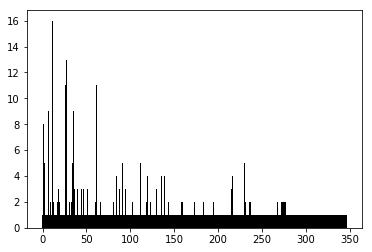

In [193]:
plt.bar(range(len(lValue)),val,width=-1.0,color="black")
plt.show()

In [194]:
words

['0',
 'good',
 '#morningnutrition',
 'https//tcogcnsj4egj8',
 '1',
 'thank',
 'goi',
 'for',
 'accepting',
 'my',
 'request',
 'to',
 'send',
 'a',
 'c..',
 '2',
 'great',
 'sharing',
 'so',
 'true',
 'https//tcox7o5n4yoln',
 '3',
 'share',
 'good',
 'practices',
 'for',
 'dengue',
 'prevention',
 'in',
 '...',
 '4',
 'good',
 '#morningnutrition',
 'https//tcoqurig7wmdo',
 '5',
 'so',
 'real',
 'so',
 'true',
 'https//tconfkmnalqvl',
 '6',
 'with',
 'the',
 'new',
 'day',
 'comes',
 'new',
 'strength',
 'and',
 'new',
 'th..',
 '7',
 'along',
 'with',
 'being',
 'catalysts',
 'for',
 'change',
 '&amp',
 'a',
 '...',
 '8',
 'a',
 'vision',
 'in',
 'practice',
 'in',
 'puducherry',
 'to',
 'the',
 'bene..',
 '9',
 'good',
 '#morningnutrition',
 'https//tcokb4fa5mpet',
 '10',
 'vande',
 'mataram',
 'performance',
 'by',
 'students',
 'of',
 'bal',
 'b..',
 '11',
 'in',
 'the',
 'conference',
 'of',
 'governors',
 'lt',
 'governors',
 '...',
 '12',
 '.',
 '@rashtrapatibhvn',
 '&amp',
 '@p